   # TRABAJO FINAL DE PYTHON (GRUPO 8): Accidentes de tráfico con implantación de bicicletas
       
       
       - Juan Carlos Aguirre García
       - Camilla Mosseddu
       - Mónica Martínez Granero
       - Adrian Méndez Carrasco          
          

# 1. Introducción

En este proyecto hemos tratado con un conjunto de datos compuesto por dos archivos `csv` que tratan sobre los accidentes de tráfico en la Ciudad de Madrid registrados por Policía Municipal, donde está implicada al menos una bicicleta en los años 2016 y 2017

El principal objetivo de dicho proyecto es realizar un estudio y análisis exploratorio de dichos datos para, posteriormente, plantearnos una serie de preguntas que serán respondidas en la parte final de este trabajo.

# 2. Carga de datos

El primer paso del proyecto es la carga de nuestros datasets en Python, para ello utilizaremos `Pandas`. Además, cabe destacar que hay que seleccionar el encoding correspondiente y también el separador que ha sido utilizado.
Otro paquete que vamos a importar es `warnings` para que no se muestren los warnings del código que escribamos en este proyecto.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

bici_2016 = pd.read_csv ('Recursos/AccidentesBicicletas_2016.csv', encoding = "iso-8859-1",sep =';', index_col=False)
bici_2017 = pd.read_csv ('Recursos/AccidentesBicicletas_2017.csv', encoding = "iso-8859-1", sep =';', index_col=False)

## 2.1. Concatenación de los datos

Juntamos ambos archivos por filas usando la función concat y los convertimos en una única tabla, creando el índice correspondiente para la misma.

In [2]:
final = pd.concat([bici_2016, bici_2017], axis = 0, sort = False, ignore_index = True)
final

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,Nº VICTIMAS *,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad
0,02/01/2016,DE 17:00 A 17:59,SABADO,LATINA,CARRIL ANILLO VERDE CICLISTA KM. ...,37800,2016/53,NO,NO,NO,...,NO,NO,SI,1.0,ATROPELLO,BICICLETA,CONDUCTOR,MUJER,IL,DE 10 A 14 AÑOS
1,03/01/2016,DE 10:00 A 10:59,DOMINGO,FUENCARRAL-EL PARDO,GLORIETA DE OLGA RAMOS ...,0,2016/64,NO,NO,NO,...,NO,NO,SI,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 55 A 59 AÑOS
2,03/01/2016,DE 20:00 A 20:59,DOMINGO,SALAMANCA,CALLE DE ALCALA NUM ...,181,2016/137,NO,NO,SI,...,NO,NO,NO,2.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS
3,05/01/2016,DE 12:00 A 12:59,MARTES,TETUAN,AVENIDA DE ASTURIAS - CALLE DE SINESIO DELGADO...,0,2016/198,NO,NO,NO,...,NO,NO,SI,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 35 A 39 AÑOS
4,06/01/2016,DE 14:00 A 14:59,MIERCOLES,RETIRO,AVENIDA DE NAZARET - CALLE DE JESUS APRENDIZ ...,0,2016/216,NO,NO,NO,...,NO,NO,SI,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,MUJER,HL,DE 55 A 59 AÑOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,27/12/2017,DE 00:00 A 00:59,MIERCOLES,CHAMBERI,CALLE DE FUENCARRAL NUM ...,111,2017/12577,NO,NO,SI,...,NO,NO,NO,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS
1511,29/12/2017,DE 7:00 A 7:59,VIERNES,BARAJAS,AVENIDA SUR DEL AEROPUERTO DE BARAJAS - AVENI...,0,2017/12658,NO,NO,NO,...,NO,NO,SI,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 35 A 39 AÑOS
1512,30/12/2017,DE 11:00 A 11:59,SABADO,CENTRO,CALLE DE LA MADERA NUM ...,51,2018/141,NO,NO,NO,...,NO,NO,NO,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 50 A 54 AÑOS
1513,31/12/2017,DE 21:00 A 21:59,DOMINGO,CHAMBERI,PASEO DE EDUARDO DATO NUM ...,2,2018/19,NO,NO,SI,...,NO,NO,NO,1.0,COLISIÓN MÚLTIPLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 21 A 24 AÑOS


# 3. Tratamiento de los datos

En este apartado prepararemos la tabla de datos renombrando las variables y convirtiéndolas al formato adecuado para poder realizar el futuro análisis.

## 3.1. Cambiar el nombre de las columnas

Quitamos los espacios y símbolos extraños de los nombres de las columnas, renombrándolas todas ellas.

In [3]:
final.columns = ['fecha','hora','dia_semana','distrito','lugar','numero_calle','numero_parte','fa_granizo','fa_hielo','fa_lluvia','fa_niebla','fa_seco','fa_nieve','sv_mojado','sv_aceite','sv_barro','sv_grava','sv_hielo','sv_seco_limpio','victimas','tipo','vehiculo','persona','sexo','lesividad','edad']
final.columns
final

,fecha,hora,dia_semana,distrito,lugar,numero_calle,numero_parte,fa_granizo,fa_hielo,fa_lluvia,...,sv_grava,sv_hielo,sv_seco_limpio,victimas,tipo,vehiculo,persona,sexo,lesividad,edad
0,02/01/2016,DE 17:00 A 17:59,SABADO,LATINA,CARRIL ANILLO VERDE CICLISTA KM. ...,37800,2016/53,NO,NO,NO,...,NO,NO,SI,1.0,ATROPELLO,BICICLETA,CONDUCTOR,MUJER,IL,DE 10 A 14 AÑOS
1,03/01/2016,DE 10:00 A 10:59,DOMINGO,FUENCARRAL-EL PARDO,GLORIETA DE OLGA RAMOS ...,0,2016/64,NO,NO,NO,...,NO,NO,SI,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 55 A 59 AÑOS
2,03/01/2016,DE 20:00 A 20:59,DOMINGO,SALAMANCA,CALLE DE ALCALA NUM ...,181,2016/137,NO,NO,SI,...,NO,NO,NO,2.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS
3,05/01/2016,DE 12:00 A 12:59,MARTES,TETUAN,AVENIDA DE ASTURIAS - CALLE DE SINESIO DELGADO...,0,2016/198,NO,NO,NO,...,NO,NO,SI,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 35 A 39 AÑOS
4,06/01/2016,DE 14:00 A 14:59,MIERCOLES,RETIRO,AVENIDA DE NAZARET - CALLE DE JESUS APRENDIZ ...,0,2016/216,NO,NO,NO,...,NO,NO,SI,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,MUJER,HL,DE 55 A 59 AÑOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,27/12/2017,DE 00:00 A 00:59,MIERCOLES,CHAMBERI,CALLE DE FUENCARRAL NUM ...,111,2017/12577,NO,NO,SI,...,NO,NO,NO,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS
1511,29/12/2017,DE 7:00 A 7:59,VIERNES,BARAJAS,AVENIDA SUR DEL AEROPUERTO DE BARAJAS - AVENI...,0,2017/12658,NO,NO,NO,...,NO,NO,SI,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 35 A 39 AÑOS
1512,30/12/2017,DE 11:00 A 11:59,SABADO,CENTRO,CALLE DE LA MADERA NUM ...,51,2018/141,NO,NO,NO,...,NO,NO,NO,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 50 A 54 AÑOS
1513,31/12/2017,DE 21:00 A 21:59,DOMINGO,CHAMBERI,PASEO DE EDUARDO DATO NUM ...,2,2018/19,NO,NO,SI,...,NO,NO,NO,1.0,COLISIÓN MÚLTIPLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 21 A 24 AÑOS



## 3.2. Visualización del tipo de datos

A continuación, vemos qué tipo de variables tenemos en nuestro fichero de datos. 

In [4]:
final.dtypes

fecha              object
hora               object
dia_semana         object
distrito           object
lugar              object
numero_calle       object
numero_parte       object
fa_granizo         object
fa_hielo           object
fa_lluvia          object
fa_niebla          object
fa_seco            object
fa_nieve           object
sv_mojado          object
sv_aceite          object
sv_barro           object
sv_grava           object
sv_hielo           object
sv_seco_limpio     object
victimas          float64
tipo               object
vehiculo           object
persona            object
sexo               object
lesividad          object
edad               object
dtype: object

## 3.3. Creación de nuevas variables

Creamos tres variables nuevas para recoger por separado el año, el mes y el día de cada valor de la variable fecha.

In [5]:
final['dia'], final['mes'] = final['fecha'].str.split('/', 1).str
final['mes'], final['ano'] = final['mes'].str.split('/', 1).str
final

,fecha,hora,dia_semana,distrito,lugar,numero_calle,numero_parte,fa_granizo,fa_hielo,fa_lluvia,...,victimas,tipo,vehiculo,persona,sexo,lesividad,edad,dia,mes,ano
0,02/01/2016,DE 17:00 A 17:59,SABADO,LATINA,CARRIL ANILLO VERDE CICLISTA KM. ...,37800,2016/53,NO,NO,NO,...,1.0,ATROPELLO,BICICLETA,CONDUCTOR,MUJER,IL,DE 10 A 14 AÑOS,02,01,2016
1,03/01/2016,DE 10:00 A 10:59,DOMINGO,FUENCARRAL-EL PARDO,GLORIETA DE OLGA RAMOS ...,0,2016/64,NO,NO,NO,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 55 A 59 AÑOS,03,01,2016
2,03/01/2016,DE 20:00 A 20:59,DOMINGO,SALAMANCA,CALLE DE ALCALA NUM ...,181,2016/137,NO,NO,SI,...,2.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS,03,01,2016
3,05/01/2016,DE 12:00 A 12:59,MARTES,TETUAN,AVENIDA DE ASTURIAS - CALLE DE SINESIO DELGADO...,0,2016/198,NO,NO,NO,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 35 A 39 AÑOS,05,01,2016
4,06/01/2016,DE 14:00 A 14:59,MIERCOLES,RETIRO,AVENIDA DE NAZARET - CALLE DE JESUS APRENDIZ ...,0,2016/216,NO,NO,NO,...,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,MUJER,HL,DE 55 A 59 AÑOS,06,01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,27/12/2017,DE 00:00 A 00:59,MIERCOLES,CHAMBERI,CALLE DE FUENCARRAL NUM ...,111,2017/12577,NO,NO,SI,...,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS,27,12,2017
1511,29/12/2017,DE 7:00 A 7:59,VIERNES,BARAJAS,AVENIDA SUR DEL AEROPUERTO DE BARAJAS - AVENI...,0,2017/12658,NO,NO,NO,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 35 A 39 AÑOS,29,12,2017
1512,30/12/2017,DE 11:00 A 11:59,SABADO,CENTRO,CALLE DE LA MADERA NUM ...,51,2018/141,NO,NO,NO,...,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 50 A 54 AÑOS,30,12,2017
1513,31/12/2017,DE 21:00 A 21:59,DOMINGO,CHAMBERI,PASEO DE EDUARDO DATO NUM ...,2,2018/19,NO,NO,SI,...,1.0,COLISIÓN MÚLTIPLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 21 A 24 AÑOS,31,12,2017


## 3.4. Eliminamos las filas con valores NaN

Haciendo uso de la función dropna, eliminamos las filas que contengan algún valor NaN y vemos cuántas filas tiene nuestra tabla de datos a estudiar.

In [6]:
final = final.dropna(axis = 0, how = 'any') 
len(final)

1513

## 3.5. Cambio del formato de ciertas variables

La fecha nos aparece como un `Object`, cuando lo correcto sería que fuese un `Datetime` con formato día, mes y año. Por este motivo, importamos los paquetes `date` y `datetime`.

In [7]:
from datetime import date, datetime
final1 = final.copy()
final1["fecha"] = pd.to_datetime(final1["fecha"], format = "%d/%m/%Y")
final1.dtypes

fecha             datetime64[ns]
hora                      object
dia_semana                object
distrito                  object
lugar                     object
numero_calle              object
numero_parte              object
fa_granizo                object
fa_hielo                  object
fa_lluvia                 object
fa_niebla                 object
fa_seco                   object
fa_nieve                  object
sv_mojado                 object
sv_aceite                 object
sv_barro                  object
sv_grava                  object
sv_hielo                  object
sv_seco_limpio            object
victimas                 float64
tipo                      object
vehiculo                  object
persona                   object
sexo                      object
lesividad                 object
edad                      object
dia                       object
mes                       object
ano                       object
dtype: object

Seguidamente haremos una limpieza de la variable hora, quedándonos únicamente con la primera hora que aparece.

Para llevar a cabo esta tarea, reemplazamos "DE " por nada, y luego partimos la cadena resultante por "A"; de esta manera, el dato deseado se encuentra en la posición 0 de la cadena generada.

In [8]:
filtro = final1.hora.apply(lambda i: i.replace("DE ", ""))
hora_1 = []
for i in filtro:
    tmp = i.split("A")
    hora_1.append(tmp[0].strip())

final1['hora']= hora_1

final1

,fecha,hora,dia_semana,distrito,lugar,numero_calle,numero_parte,fa_granizo,fa_hielo,fa_lluvia,...,victimas,tipo,vehiculo,persona,sexo,lesividad,edad,dia,mes,ano
0,2016-01-02,17:00,SABADO,LATINA,CARRIL ANILLO VERDE CICLISTA KM. ...,37800,2016/53,NO,NO,NO,...,1.0,ATROPELLO,BICICLETA,CONDUCTOR,MUJER,IL,DE 10 A 14 AÑOS,02,01,2016
1,2016-01-03,10:00,DOMINGO,FUENCARRAL-EL PARDO,GLORIETA DE OLGA RAMOS ...,0,2016/64,NO,NO,NO,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 55 A 59 AÑOS,03,01,2016
2,2016-01-03,20:00,DOMINGO,SALAMANCA,CALLE DE ALCALA NUM ...,181,2016/137,NO,NO,SI,...,2.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS,03,01,2016
3,2016-01-05,12:00,MARTES,TETUAN,AVENIDA DE ASTURIAS - CALLE DE SINESIO DELGADO...,0,2016/198,NO,NO,NO,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 35 A 39 AÑOS,05,01,2016
4,2016-01-06,14:00,MIERCOLES,RETIRO,AVENIDA DE NAZARET - CALLE DE JESUS APRENDIZ ...,0,2016/216,NO,NO,NO,...,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,MUJER,HL,DE 55 A 59 AÑOS,06,01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,2017-12-26,18:00,MARTES,RETIRO,AVENIDA DE MENENDEZ PELAYO - CALLE DEL DOCE DE...,0,2017/12591,NO,NO,SI,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 30 A 34 ANOS,26,12,2017
1510,2017-12-27,00:00,MIERCOLES,CHAMBERI,CALLE DE FUENCARRAL NUM ...,111,2017/12577,NO,NO,SI,...,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS,27,12,2017
1511,2017-12-29,7:00,VIERNES,BARAJAS,AVENIDA SUR DEL AEROPUERTO DE BARAJAS - AVENI...,0,2017/12658,NO,NO,NO,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 35 A 39 AÑOS,29,12,2017
1512,2017-12-30,11:00,SABADO,CENTRO,CALLE DE LA MADERA NUM ...,51,2018/141,NO,NO,NO,...,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 50 A 54 AÑOS,30,12,2017


A continuación, también cambiamos el formato de la variable edad. Primero eliminamos las edades que son mayores de 74 años, de valor desconocido y nulas. Con la función split partimos por espacios cada cadena de la variable edad y, así, el valor de la posición 1 corresponde con la primera edad del rango dado y el valor de la posición 3 con la segunda edad de dicho rango. Esta última edad será con la que trabajaremos durante todo el proceso del análisis de los datos. Es importante tener en cuenta que Python comienza contando por la posición 0.

In [9]:
final2 = final1[(final1.edad != 'DESCONOCIDA') & (final1.edad != 'DE MAS DE 74')]

columna_sin_vacios = final2['edad'][final2['edad'].notnull()] 

columna_filtrada = columna_sin_vacios.apply(lambda x: x.split(' '))

edad_2 = [i[3].replace(' ','') for i in columna_filtrada] 

final2.edad = edad_2

final2

,fecha,hora,dia_semana,distrito,lugar,numero_calle,numero_parte,fa_granizo,fa_hielo,fa_lluvia,...,victimas,tipo,vehiculo,persona,sexo,lesividad,edad,dia,mes,ano
0,2016-01-02,17:00,SABADO,LATINA,CARRIL ANILLO VERDE CICLISTA KM. ...,37800,2016/53,NO,NO,NO,...,1.0,ATROPELLO,BICICLETA,CONDUCTOR,MUJER,IL,14,02,01,2016
1,2016-01-03,10:00,DOMINGO,FUENCARRAL-EL PARDO,GLORIETA DE OLGA RAMOS ...,0,2016/64,NO,NO,NO,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,59,03,01,2016
2,2016-01-03,20:00,DOMINGO,SALAMANCA,CALLE DE ALCALA NUM ...,181,2016/137,NO,NO,SI,...,2.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,29,03,01,2016
3,2016-01-05,12:00,MARTES,TETUAN,AVENIDA DE ASTURIAS - CALLE DE SINESIO DELGADO...,0,2016/198,NO,NO,NO,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,39,05,01,2016
4,2016-01-06,14:00,MIERCOLES,RETIRO,AVENIDA DE NAZARET - CALLE DE JESUS APRENDIZ ...,0,2016/216,NO,NO,NO,...,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,MUJER,HL,59,06,01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,2017-12-26,18:00,MARTES,RETIRO,AVENIDA DE MENENDEZ PELAYO - CALLE DEL DOCE DE...,0,2017/12591,NO,NO,SI,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,34,26,12,2017
1510,2017-12-27,00:00,MIERCOLES,CHAMBERI,CALLE DE FUENCARRAL NUM ...,111,2017/12577,NO,NO,SI,...,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,29,27,12,2017
1511,2017-12-29,7:00,VIERNES,BARAJAS,AVENIDA SUR DEL AEROPUERTO DE BARAJAS - AVENI...,0,2017/12658,NO,NO,NO,...,1.0,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,39,29,12,2017
1512,2017-12-30,11:00,SABADO,CENTRO,CALLE DE LA MADERA NUM ...,51,2018/141,NO,NO,NO,...,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,54,30,12,2017


Por último, para finalizar la limpieza de los datos, cambiaremos la variable `edad` a formato int.

In [10]:
final2.edad = final2.edad.apply(lambda x: int (x))
final2.dtypes

fecha             datetime64[ns]
hora                      object
dia_semana                object
distrito                  object
lugar                     object
numero_calle              object
numero_parte              object
fa_granizo                object
fa_hielo                  object
fa_lluvia                 object
fa_niebla                 object
fa_seco                   object
fa_nieve                  object
sv_mojado                 object
sv_aceite                 object
sv_barro                  object
sv_grava                  object
sv_hielo                  object
sv_seco_limpio            object
victimas                 float64
tipo                      object
vehiculo                  object
persona                   object
sexo                      object
lesividad                 object
edad                       int64
dia                       object
mes                       object
ano                       object
dtype: object

# 4. Análisis exploratorio de los datos

El primer paso a la hora de realizar el análisis es la carga de las librerías correspondientes, en este caso utilizaremos `seaborn`, `matplotlib.pyplot` y `numpy`. También importamos `rcParams`para ajustar el tamaño de las gráficas que vamos a crear.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

## 4.1. Accidentes por sexo y tipo de accidente
En el siguiente gráfico analizamos el número de personas por sexo, agrupando por tipo de accidente. En él se puede observar que los **hombres** tienen un mayor número de acidentes, sobre todo por **colisión doble** (Accidente de tráfico ocurrido entre dos vehículos en movimento) y **caída bicicleta** (Accidente sufrido por una bicicleta, que en determinado momento pierde el equilibrio, por causa del conductor o por las circunstancias de la vía).

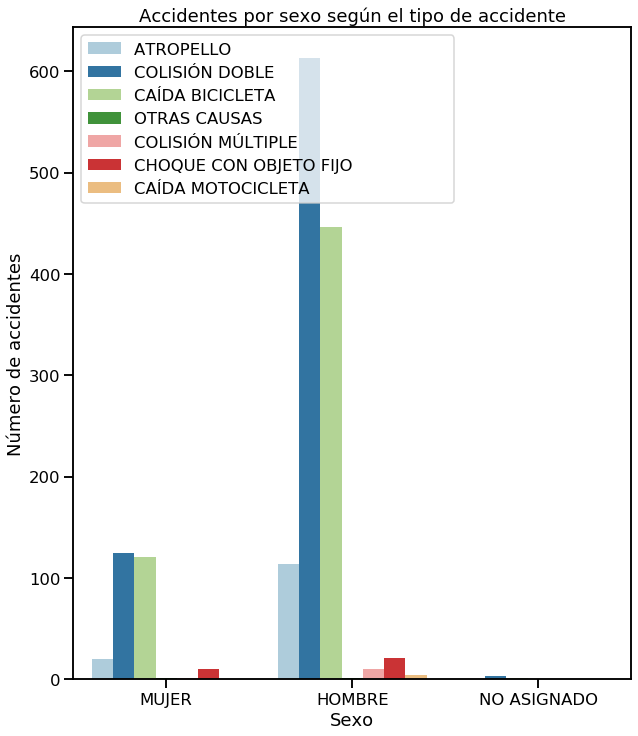

In [12]:
rcParams['figure.figsize']= 10, 12
sns.set_context('talk')

grafico1 = sns.countplot(x='sexo', hue='tipo', data=final2, palette='Paired')
out = plt.xlabel("Sexo")
out = plt.ylabel("Número de accidentes")
out = plt.title("Accidentes por sexo según el tipo de accidente")
out = plt.legend(loc='best')

## 4.2. Accidentes según la lesividad y el número de víctimas

Aclaremos que la variable `victimas` indica el número de personas cuya integridad se ha visto afectada como consecuencia del accidente. También es importante mencionar que los diferentes grados de lesividad que se han dado en los accidentes son:

    - IL : Impacto leve
    - HL : Heridas leves
    - HG : Heridas graves
    - MT : Muerto
    - NO ASIGNADA : La lesividad no ha sido registrada

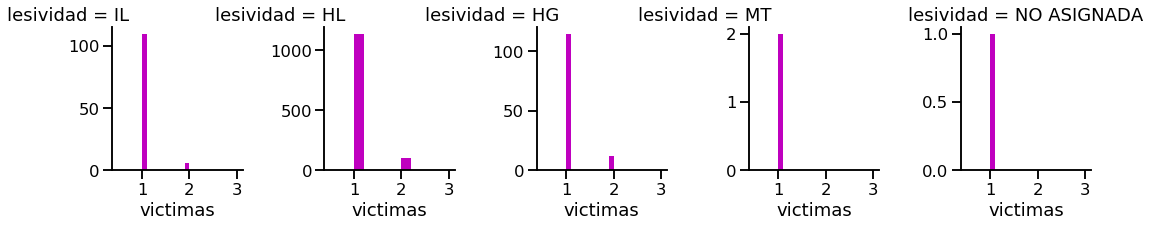

In [13]:
g = sns.FacetGrid(final2, col="lesividad", sharey=False)
g.map(plt.hist, "victimas", color='m')

Podemos observar que las heridas leves (HL) son las más habituales y, a su vez, se puede apreciar que en muy pocas ocasiones se producen accidentes con varias víctimas ya que, en estos casos, el conductor de la bicicleta suele ser el mayor perjudicado.

## 4.3. Número de víctimas por día de la semana

En el siguiente gráfico, se muestran los días de las semana y cuántas víctimas se producen en ellos.

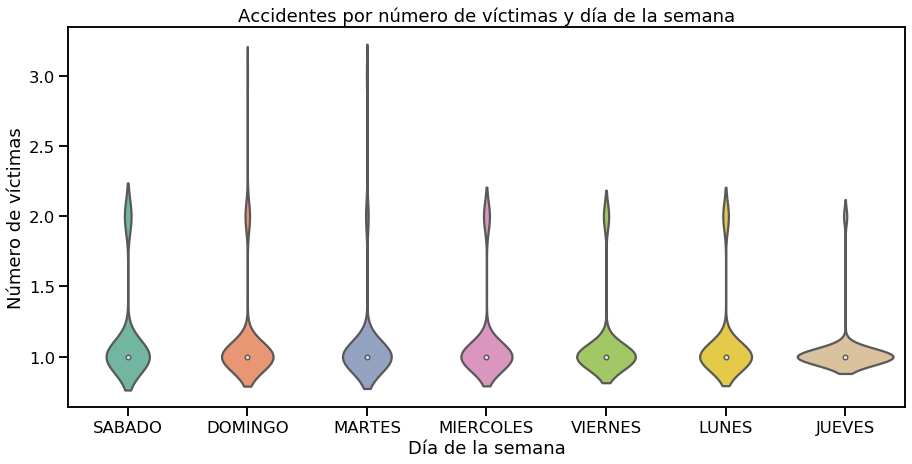

In [14]:
rcParams['figure.figsize']= 15, 7
sns.set_context('talk')
Grafico3 = sns.violinplot(x='dia_semana', y='victimas', data=final2, palette='Set2')
out = plt.xlabel("Día de la semana")
out = plt.ylabel("Número de víctimas")
out = plt.title("Accidentes por número de víctimas y día de la semana")

Observando el gráfico se puede destacar que el Jueves es el día de la semana en el que se producen más accidentes. A su vez, se ve que en el fin de semana, en especial el Domingo, es cuando se producen los accidentes más graves ya que el número de víctimas es mayor, produciéndose accidentes con hasta 3 víctimas implicadas.

## 4.4. Suelo mojado frente a suelo seco

A continuación, mostramos una comparativa haciendo uso de un espectro de los accidentes que se producen con el suelo está mojado o no. Aprovechando este apartado, comentaremos que las variables que comienzan con `sv` se refieren a circunstancias que afectan al estado de la vía en el momento de producirse el siniestro y las que comienzan con `fa` se refieren a las condiciones ambientales que se dan en el momento del siniestro.

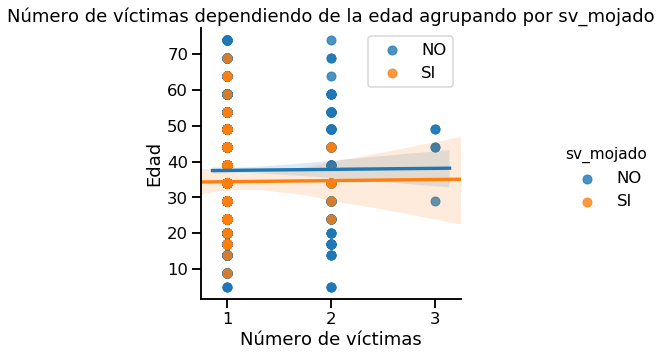

In [15]:
rcParams['figure.figsize']= 15, 7
sns.set_context('talk')
Grafico4 = sns.lmplot(x = 'victimas', y ='edad', hue ='sv_mojado', data=final2)
out = plt.xlabel("Número de víctimas")
out = plt.ylabel("Edad")
out = plt.title("Número de víctimas dependiendo de la edad agrupando por sv_mojado")
out = plt.legend(loc='best')

Atendiendo al espectro generado, podemos observar que es mucho mayor la amplitud cuando llueve, lo que significa que los accidentes se producen en un rango mayor de edad, mientras que cuando el suelo no está mojado, afecta a un rango menor de edades. Esto nos puede dar a entender que las personas mayores tienen una mayor propensión a sufrir accidentes de bicicleta cuando el pavimento se encuenta mojado.

## 4.5. Accidentes por horas del día

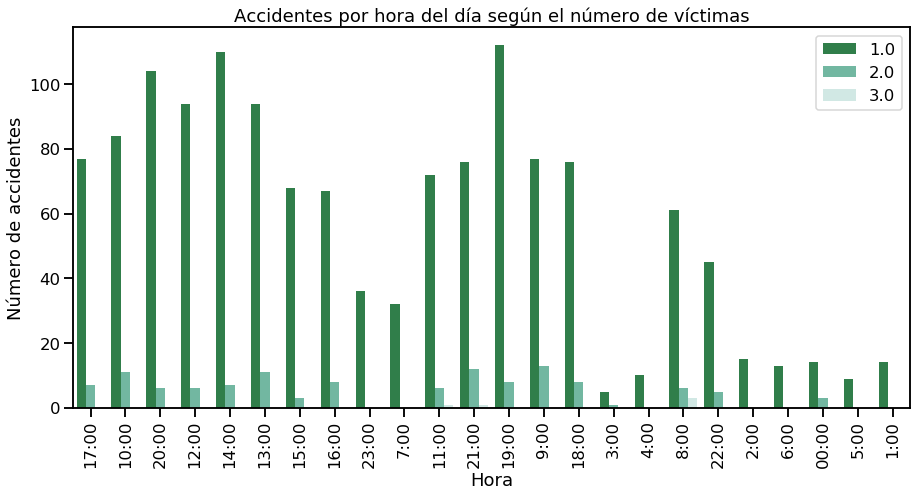

In [16]:
rcParams['figure.figsize']= 15, 7
sns.set_context('talk')
Grafico5 = sns.countplot(x='hora', hue='victimas', data=final2, palette='BuGn_r')
out= plt.xticks(rotation = 90)
out=plt.xlabel("Hora")
out=plt.ylabel("Número de accidentes")
out=plt.title("Accidentes por hora del día según el número de víctimas")
out=plt.legend(loc='upper right')

Analizando el gráfico realizado, se puede apreciar que a las 14:00 se produce un pico de accidentes, esto puede ser debido a que muchas personas se desplazan a sus trabajos por este medio. También encontramos otro pico a las 19:00, el cual es el más alto de la tabla.

Si nos fijamos en los accidentes que incluyen a dos víctimas, encontramos que las 9:00 y las 21:00 son las más punteras, esto coincide con la entrada y salida de muchos trabajos y universidades, lo que puede suponer una de las razones por las que se produzcan especificamente a estas horas.

## 4.6. Tabla comparativa de víctimas totales
En la siguiente tabla podemos destacar que el número de víctimas en 2017 fue mayor que en 2016; sin embargo, en los dos años estudiados el número de víctimas es casi el mismo con una diferencia de 16 víctimas entre ellos.

In [17]:
total = final2.groupby('ano').victimas.apply(lambda x: x.sum()).reset_index()
Comparativa_Victimas = pd.DataFrame(total)
Comparativa_Victimas = Comparativa_Victimas.sort_values('victimas', ascending=False)
Comparativa_Victimas

,ano,victimas
1,2017,819.0
0,2016,803.0


## 4.7. Tabla y gráfico de víctimas por distritos

In [18]:
total1 = final2.groupby('distrito').victimas.apply(lambda x: x.sum()).reset_index()
Comparativa_Distrito = pd.DataFrame(total1)
Comparativa_Distrito = Comparativa_Distrito.sort_values('victimas', ascending=False)
Comparativa_Distrito

,distrito,victimas
3,CENTRO,257.0
13,RETIRO,131.0
10,MONCLOA-ARAVACA,129.0
5,CHAMBERI,107.0
0,ARGANZUELA,101.0
14,SALAMANCA,95.0
2,CARABANCHEL,92.0
7,FUENCARRAL-EL PARDO,91.0
15,SAN BLAS,78.0
16,TETUAN,71.0


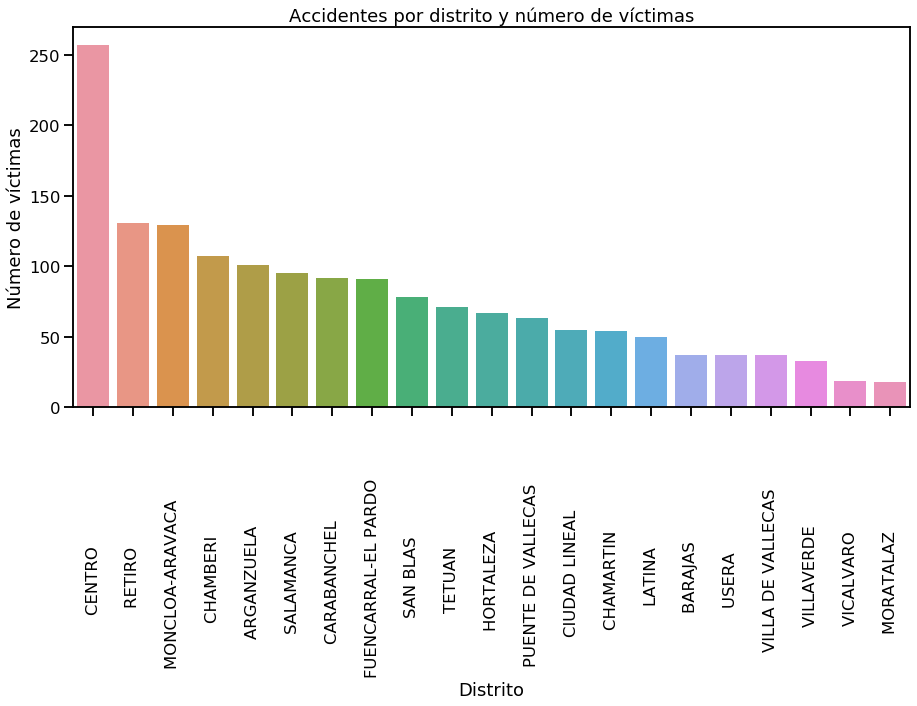

In [19]:
out = sns.barplot(x='distrito', y='victimas', data=Comparativa_Distrito)
out= plt.xticks(rotation = 90)
out=plt.xlabel("Distrito")
out=plt.ylabel("Número de víctimas")
out=plt.title("Accidentes por distrito y número de víctimas")


Nótese que el distrito Centro es el que más accidentes aglutina con 257 accidentes y el que menos accidentes ocasiona es Moratalaz con 18 accidentes. Claramente se aprecia una gran diferencia entre el Centro y los demás distritos en cuanto al número de víctimas.

## 4.8. Índice de lesividad

In [20]:
total2 = final2.groupby('lesividad').victimas.apply(lambda x: x.sum())
Comparativa_Lesividad = pd.DataFrame(total2)
Comparativa_Lesividad = Comparativa_Lesividad.sort_values('victimas', ascending=False).reset_index()
Comparativa_Lesividad

,lesividad,victimas
0,HL,1358.0
1,HG,139.0
2,IL,122.0
3,MT,2.0
4,NO ASIGNADA,1.0


Como anteriormente hemos dicho, aquí demostramos con más precisión que la mayoría de lesiones que se producen en los accidentes son heridas leves.

## 4.9. Tabla y gráfico de la edad media de las víctimas por distrito
En la siguiente tabla se puede apreciar la edad media de las personas afectadas en los accidentes producidos en cada uno de los distritos.

In [21]:
MediaEdad_x_distrito = final2.groupby('distrito').edad.apply(lambda i: i.mean()).reset_index()
MediaEdad_x_distrito = pd.DataFrame(MediaEdad_x_distrito)
MediaEdad_x_distrito.columns = ["distrito","edad_media"]
MediaEdad_x_distrito = MediaEdad_x_distrito.sort_values('edad_media', ascending=False).reset_index()
MediaEdad_x_distrito.drop(['index'], axis=1)

,distrito,edad_media
0,VICALVARO,43.666667
1,MORATALAZ,41.812500
2,LATINA,41.666667
3,MONCLOA-ARAVACA,40.201754
4,BARAJAS,39.914286
5,HORTALEZA,39.416667
6,SAN BLAS,38.705882
7,FUENCARRAL-EL PARDO,38.593023
8,RETIRO,38.556452
9,VILLA DE VALLECAS,38.424242


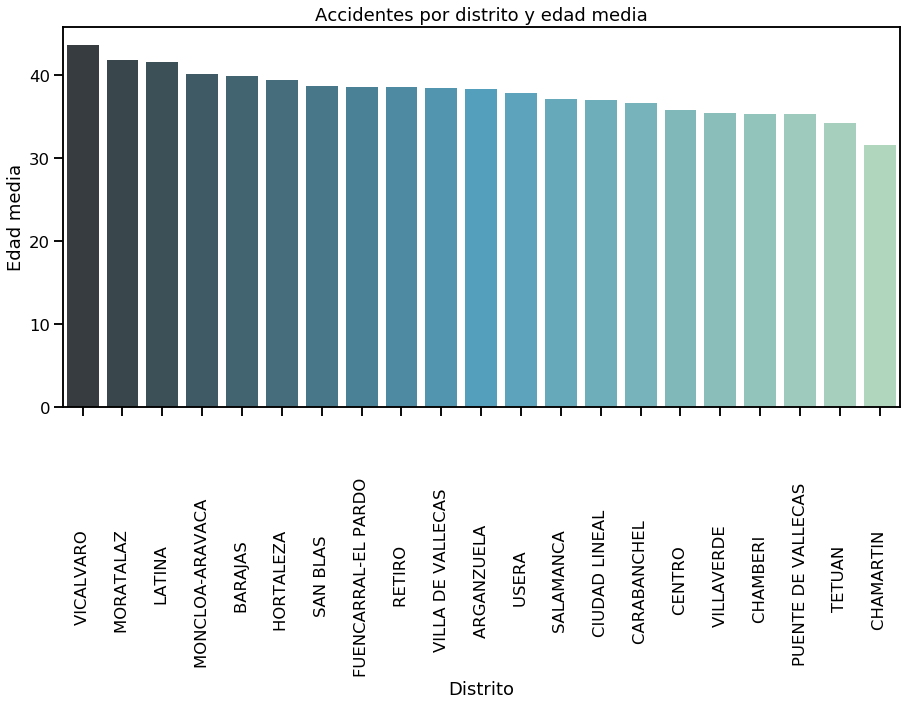

In [22]:
m = sns.barplot(x='distrito', y='edad_media', data=MediaEdad_x_distrito, palette='GnBu_d')
m = plt.xticks(rotation = 90)
out=plt.xlabel("Distrito")
out=plt.ylabel("Edad media")
out=plt.title("Accidentes por distrito y edad media")

A partir de la tabla y la gráfica anteriores se deduce que el distrito Vicálvaro es en el que la edad media de las personas afectas es mayor. En la gráfica se aprecia que un color más oscuro denota una mayor edad media.

# 5. Conclusión

A modo de resumen, construimos una tabla que muestra el distrito, el número de víctimas y la edad media de las personas afectadas en los accidentes producidos.

In [23]:
np = Comparativa_Distrito.merge(MediaEdad_x_distrito).reset_index()
np.drop(['level_0','index'], axis=1)

,distrito,victimas,edad_media
0,CENTRO,257.0,35.781513
1,RETIRO,131.0,38.556452
2,MONCLOA-ARAVACA,129.0,40.201754
3,CHAMBERI,107.0,35.391753
4,ARGANZUELA,101.0,38.296703
5,SALAMANCA,95.0,37.096774
6,CARABANCHEL,92.0,36.670732
7,FUENCARRAL-EL PARDO,91.0,38.593023
8,SAN BLAS,78.0,38.705882
9,TETUAN,71.0,34.205882


Por último y como conclusión a este análisis exploratorio de los datos, podemos decir que el distrito que más accidentes de bicicletas presenta es el Centro con 257 víctimas, las cuales presentan una edad media de 35 años y que los accidentes se suelen producir los Jueves. La gravedad de dichos accidentes no suele ser muy grave ya que suelen producirse heridas leves los implicados y las horas más conflictivas son aquellas en las cuales un mayor número de personas se desplazan al mismo tiempo, como son las horas de entrada y salida del trabajo y centros escolares.